In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Central Limit Theorem
On last lecture, we discussed the **Central Limit Theorem**. 

## Sample Averages
1. The **Central Limit Theorem** describes scenarios in which the normal distribution (a bell-shaped curve) arises
    * It says that we obtain a **normal** distribution or bell-shaped curve on certain situations even though most distributions in real world is not usually bell-shaped.

2. Most distributions we observed were not bell-shaped, but empirical distributions of **sample averages** were.
    * If we go out to the world, take samples and look at the average of the sample, the distribution of the averages is bell shaped. 

3. Sample averages estimate population averages
    * In the previous lecture, we used sample averages to estimate the population averages. 

4. A proportion within a sample is a sample average
    * We also went over a trick, "if the data contains `1`s and `0`s, where `1` is when something happened and `0` is when something didn't happen, if we take the average of those `1`s and `0`s, we can get the proportion of times our event happened". 

Suppose we mark down the days we drink tea with `1` and the days we don't drink tea with `0`. When we take the average of these `1`s and `0`s, we get the proportion of days when we drink tea.

Even though we're talking about sample averages, we can actually use sample averages to estimate population average or proportion depending on how we work with the data. 

## Central Limit Theorem
In particular, the **Central Limit Theorem** says:

"If the sample is **large** and **drawn at random with replacement**, then **no matter what the population distribution looks like**, the **probability distribution of the sample average (or sample `sum`) is roughly bell shaped**". 

Let's take a look on what this looks like.
## Demo
Here we have a coin that gives heads 60% of the time.

In [2]:
coin = Table().with_column(
    'Face', ['Heads', 'Tails'],
    'Chance', [0.6, 0.4]
)
coin

Face  | Chance
Heads | 0.6
Tails | 0.4

And now we'll call a special method `sample_from_distribution`, and the method takes in the `Chance` column and flip `1,000` times.

In [3]:
sample = coin.sample_from_distribution('Chance', 1000)
sample

Face  | Chance | Chance sample
Heads | 0.6    | 609
Tails | 0.4    | 391

We expect the number of `heads` in `1,000` flips is about `600` since the probability is 60%. 

The **Central Limit Theorem** says that if we take a bunch of these samples, we should see a bell-shaped curve for the number of `heads` that we have.

Let's try doing this in a `for` loop,

In [4]:
heads = [] # An array that contains the number of heads we get for every repetition
for i in np.arange(10000):
    sample = coin.sample_from_distribution('Chance', 1000)
    heads.append(sample.column('Chance sample').item(0))
    
Table().with_column('Number of heads', heads).show(3)

Above, every row represents the number of times we obtain `heads` for every `1000` coin flips. Let's plot this on a histogram,

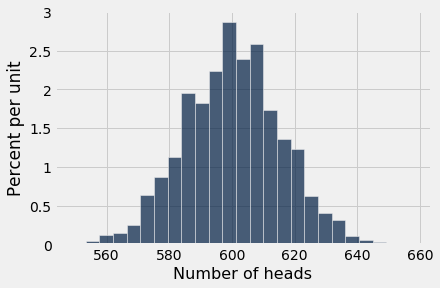

In [5]:
Table().with_column('Number of heads', heads).hist(bins = 25)

It's not super smooth, but close enough to a bell shape. 

Recall that the original population distribution consists of `0.6` heads and `0.4` tails. Even though the population distribution is not bell-shaped (there are only 2 chances, `0.6` or `0.4`), once we take samples and look at the distribution of the sample `mean`, we obtian the bell shape. 

## The Normal Distribution
Recall from the previous lecture, we looked at what `SD` can tell us about our distribution. 

| Percent in Range | All Distributions | Normal Distribution |
| --- | ---- | ----|
| Average $\pm$ 1 SDs | at least 0% | about 68%|
| Average $\pm$ 2 SDs | at least 75% | about 95%|
| Average $\pm$ 3 SDs | at least 88.888...%| about 99.73%|

For all distributions, we have some bounds on "how much of the distribution falls within some `SD`s away from the average". 

Chebyshev's Inequality says, "no matter what the distribution looks like, even if it's flat or U or some other weird shapes, we're always going to have at least 75% of the distribution within 2 `SD`s of the average."

However, if we have a **normal** or "almost normal" distribution, then we can expect about 95% to be within 2 `SD`s of the average. 

Every bell-shaped curve is called **the normal distribution**.
* The interesting thing about all normal distributions is that the shape look like a smooth bell curve. 

The distinguishing features between different normal distributions are the **average (center)* and **standard deviation (spread)** of the bell curve. Thus, if we have a bunch of bell-shaped normal distributions, we can describe each of them just by looking at the `average` and the `SD`.

### How big does the sample need to be?
Recall the **Central Limit Theorem** requires the sample to be large. 

How large our sample need to be in order to obtain the bell shape curve?

## Demo
Recall the dataset of flight delay times from United Airlines domestic flights departing from San Francisco. The delays are in minutes. Negative delay means the flight left early. 

In [6]:
united = Table.read_table('united_summer2015.csv')
united.show(3)

Let's try looking at the distribution of the delays,

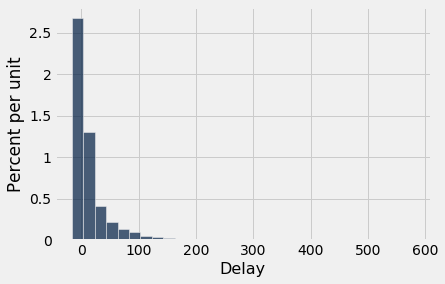

In [7]:
united.hist('Delay', bins = 30)

From the histogram above, notice that most of the delays are close to `0` minutes. This is clearly not a normal distribution. It's not symmetric, it's not going up then down. 

Let's take the `mean` and `SD` of the delays,

In [8]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

Now let's take just the `Delay` column from the original table,

In [9]:
delay = united.select('Delay')
delay.show(3)

Then the next step is to take a sample of the delay above and compute the average. Recall the `sample` method by default samples with replacement. Let's use `400` as the sample size.

In [10]:
sample = delay.sample(400)
np.mean(sample.column(0))

17.6075

If we run the cell above multiple times, we'll obtain different results! Now let's repeat the sample-taking procedure multiple times, compute each of the average and construct a histogram.

In [11]:
means = []
for i in np.arange(10000):
    sample = delay.sample(400)
    means.append(np.mean(sample.column(0)))

From the original delay table, we took samples of size 400 and computed the average delay of every sample. Now let's see the distribution,

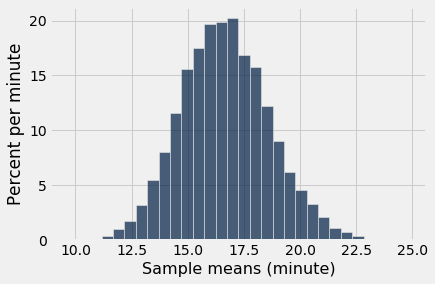

In [12]:
Table().with_column('Sample means', means).hist(bins = 30, unit = 'minute')

We obtain a bell shape distribution!

Recall that the population distribution was definitely not bell shaped! We obtain bell shape when take large enough samples from the population and look at the averages.  

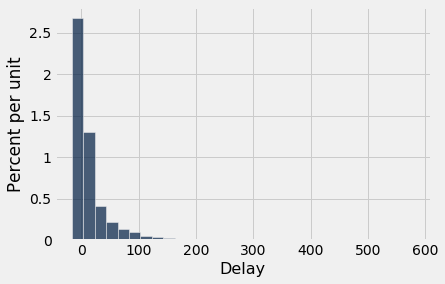

In [13]:
united.hist('Delay', bins = 30)

Above, each data represents individual flights. However, 

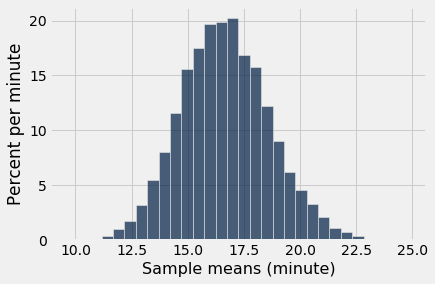

In [14]:
Table().with_column('Sample means', means).hist(bins = 30, unit = 'minute')

Above, each data is not an individual flight. Each of this is a sample of size 400.

### What would happen if we change the repetitions to 10? or if we change the sample size to 10? What would the distribution look like?

# Variability of the Sample Average
What we're asking is, how does the variation of the sample average change if we change something in the simulation?

## Repeated Sampling
The purpose of repeated sampling is to understand how a statistic could have been different
* When we take `1` sample, we can make `1` estimation of the population parameter. So if we take `1` sample of flight, we can get `1` estimate for the population average flight delay. 
* We want multiple samples to figure out the variation of flight delays

If the statistic is an average of a large random sample, then we know the statistic is drawn from a bell curve, by Central Limit Theorem.

We still have important questions:
1. Where is the center of that bell curve?
2. How wide (spread) is that bell curve?

These 2 questions will allow us to characterize "how big the sample should be to obtain this shape", "how many repetitions should be done", etc.

## Demo
Let's go back to the `for` loop code that collects `mean`s of flight and put it into a function that takes in a sample size and return the array of `mean`s.

In [15]:
def sample_means(sample_size):
    means = []
    for i in np.arange(10000):
        sample = delay.sample(sample_size)
        means.append(np.mean(sample.column(0)))
    return means

Using the function above, we can compare the distributions of varying sample sizes in one overlay histogram,

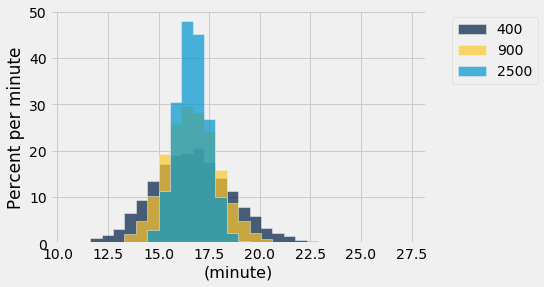

In [16]:
Table().with_column(
    '400', sample_means(400),
    '900', sample_means(900),
    '2500', sample_means(2500)
).hist(bins = 30, unit = 'minute')

Above, we can see that the center of the distributions is around the same spot. With different sample size, the spread of the distribution also differs. As we increase the sample size, the distribution becomes more narrow. 

How narrow do these distributions can become? Is this narrowness important?

## Variability of the Sample Mean
How does the variation of the distribution change as the sample size is increased?

We saw earlier that as we increase the sample size, the distribution becomes more narrow. This intuitively makes sense. Suppose we have a coin and flip it 10 times, this is like taking a sample of sample size 10. We should obtain around 5 heads; however, it wouldn't be surprising if we happened to obtain less or more than that. Thus with 10 flips, we have a good amount of variation around the 5. 

If we increase the number of flips to `100`, then we expect to see 50 heads. The variation around the `50` is less than then variation around the `5`. We expect that the variation is not far from `48`, or `52`. 

If we increase the number of flips to `1000`, then we expect `500` heads. At this point, the variation most likely has become relatively small.

As we increase the sample size, we decrease the variation in sample average or the number of heads that we obtain. 

In particular, if we:
1. Fix a large sample size
2. Draw all possible random samples from that size
    * In the coin flip example, if we have 10 flips, we look at every single possible set of 10 flips
        * All heads, 9H1T, 8H2T, etc.

3. Then we'll end up with a lot of means, and
4. The distribution of those is the **probability distribution of the sample mean**
    * Since we're looking at every single possible sample, we obtain the entire real theoretical distribution of the sample mean

Recall in the lecture that we took `10,000` repetitions of sample, which is not every possible sample (We have `13,825` rows. All combination of `13,825` is an astronomically huge number). Thus, instead of obtaining the **probability distribution of the sample mean**, we **estimated** it. As we increase the repetitions, we get closer to the probability distribution.

5. The probability distribution is roughly normal, centered at the population `mean`
6. The `SD` of the probability distribution is:
\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

Notice the formula above, we are relating 2 quantities (`population SD` and `sample size`) that don't seem to be related. If we go back to our `united` distribution,

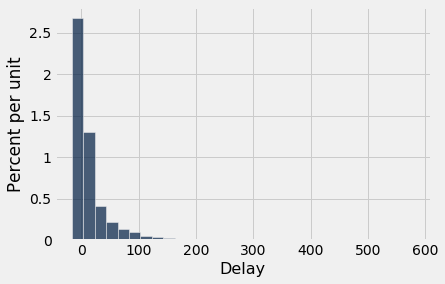

In [17]:
united.hist('Delay', bins = 30)

And the distribution above has the following `mean` and `SD`.

In [18]:
mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

It turns out that we can relate the `SD` above with the `SD` of the distribution of the `sample means` below,

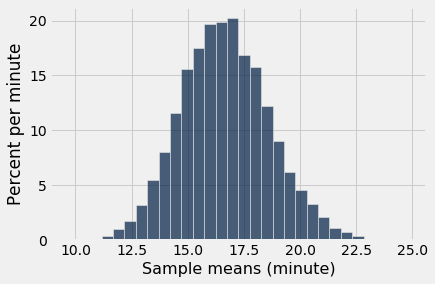

In [19]:
Table().with_column('Sample means', means).hist(bins = 30, unit = 'minute')

There's a lot of mathematics on how and why this work, but we're not going to cover it in this class.

Now going back to the `SD` formula,
\begin{equation*}
SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

This means as the `sample size` increases, the distribution of the sample averages becomes smaller / more narrow (`SD` decreases). This is intuitively related to what we saw before: as we increase the sample size, the spread of the sample `mean`s decreases.

Now let's take more samples!

### How does the `SD` change as we increase `sample_size`?
To see if **"as the `sample size` increases, the distribution of the sample averages becomes smaller / more narrow (`SD` decreases)"** is true, we will define the function `variability` that takes in a `sample_size` and constructs a histogram of `sample means` of the flight delays,

In [26]:
def variability(sample_size):
    means = sample_means(sample_size) #Uses the function 'sample_means' and store it in 'means'
    #Construct a histogram from the array 'means' above
    Table().with_column('Sample means', means).hist(bins = 30, unit = 'minute')
    
    print('Sample size:        ', sample_size)

If we try `sample size` of `400`,

Sample size:         400


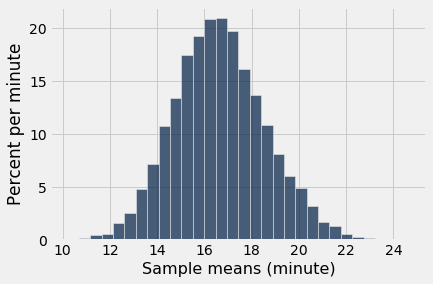

In [25]:
variability(400)

It looks similar to the distribution that we constructed earlier in the lecture!

Recall the formula again,
\begin{equation*}
SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

This means the `SD` of the distribution above should be the `SD` of the original dataset divided by the square root of the sample size. Let's see if this is true. Below we redefine the function `variability` so that it calculates prints and calculates the same pa

In [44]:
def variability(sample_size):
    means = sample_means(sample_size)
    Table().with_column('Sample means', means).hist(bins = 30, unit = 'minute')
    sqrt_n = np.sqrt(sample_size) # sqrt_n is the square root of the sample_size
    
    print('Sample size:               ', sample_size)
    print('Sqrt of sample size:       ', sqrt_n)
    print('Population SD:             ', sd_delay)
    print('Sample mean SD using numPy:', np.std(means)) # Calculated with numPy
    # Below is the Sample mean SD calculated using the formula "variability of the sample mean"
    print('Sample mean SD using formula is calculated below,')
    print(sd_delay,'/', sqrt_n, '=', sd_delay / sqrt_n)

Sample size:                400
Sqrt of sample size:        20.0
Population SD:              39.480199851609314
Sample mean SD using numPy: 1.972552333704213
Sample mean SD using formula is calculated below,
39.480199851609314 / 20.0 = 1.9740099925804657


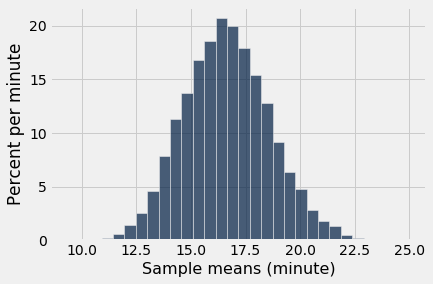

In [45]:
variability(400)

Notice above that the `SD` of the sample mean calculated using `np.std` is close to the `SD` calculated using the formula.

What happens if we double the sample size?

Sample size:                800
Sqrt of sample size:        28.284271247461902
Population SD:              39.480199851609314
Sample mean SD using numPy: 1.400553206384869
Sample mean SD using formula is calculated below,
39.480199851609314 / 28.284271247461902 = 1.3958358518836536


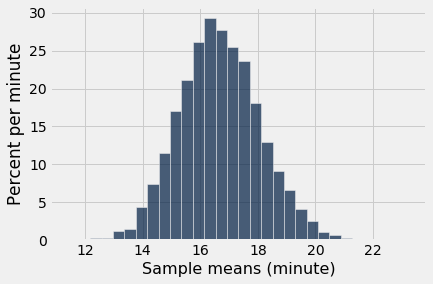

In [46]:
variability(800)

The sample mean `SD` above is lower by $\sqrt{2}$! This is because we now have a sample size `800`. If we take the square root of both `400` and `800`, $\sqrt{800}$ is greater than $\sqrt{400}$ by a factor of $\sqrt{2}$.

What if we do `3200`?

Sample size:                3200
Sqrt of sample size:        56.568542494923804
Population SD:              39.480199851609314
Sample mean SD using numPy: 0.6944519989093968
Sample mean SD using formula is calculated below,
39.480199851609314 / 56.568542494923804 = 0.6979179259418268


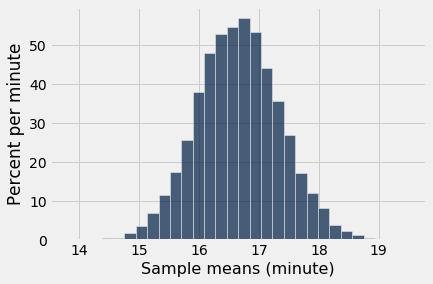

In [48]:
variability(3200)

If we take the square root of both `800` and `3200`, $\sqrt{3200}$ is greater than $\sqrt{400}$ by a factor of $\sqrt{4}$, which is 2. This means the `SD` above should be half of the `SD` when the sample size is `800`.

## Discussion Question
Assume we're sampling from the flight delay distribution. If we repeatedly compute the mean from a sample size of `1`,
1. What will be the shape of the probability histogram?
2. What will be its standard deviation? 

Sample size:                1
Sqrt of sample size:        1.0
Population SD:              39.480199851609314
Sample mean SD using numPy: 38.733947320664335
Sample mean SD using formula is calculated below,
39.480199851609314 / 1.0 = 39.480199851609314


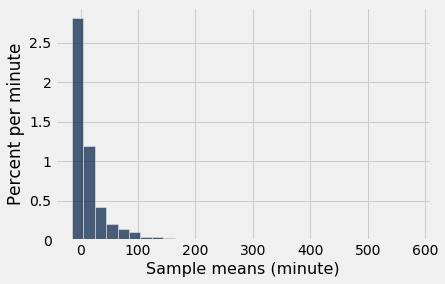

In [49]:
variability(1)

The sample mean distribution looks exactly like the original population distribution! Why is this?

When we take a sample of size 1, we take 1 flight at a time and plot the individual flights in the histogram. This means we obtained the same (not exactly) distribution as the population. 

If we look at the `average` and the `SD` of the histogram above, the values will be close to what we obtained from the original population. Recall the formula,
\begin{equation*}
SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}
If the `sample size` is 1, that means the sample mean `SD` will be the same as the population `SD`

### What happens if we change the sample size to `2`?

Sample size:                2
Sqrt of sample size:        1.4142135623730951
Population SD:              39.480199851609314
Sample mean SD using numPy: 28.35928405650432
Sample mean SD using formula is calculated below,
39.480199851609314 / 1.4142135623730951 = 27.91671703767307


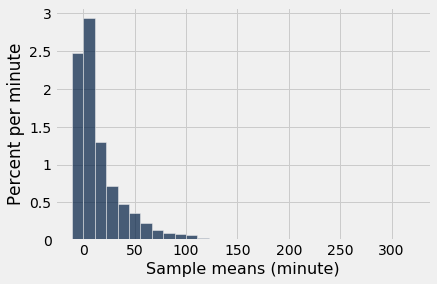

In [50]:
variability(2)

Recall with a sample size `1`, the tallest bar was at the left end. The histogram above has the tallest bar somewhere in the middle!

### What happens if we increase the sample size little by little?

In [53]:
_ = interact(variability, sample_size = [2, 4, 8, 16, 32, 64, 128, 256])

interactive(children=(Dropdown(description='sample_size', options=(2, 4, 8, 16, 32, 64, 128, 256), value=2), O…

As we increase the sample size, the **Central Limit Theorem** is happening. As the sample size increase, the distribution will look more like a normal distribution. 

As a recap, if our sample size is very small (e.g. `1`), we will obtain a distribution that's close to the population distribution. As we increase the sample size, the Central Limit Theorem starts taking effect, and the distribution becomes more of a bell shape. 

### Extra Question:
1. What if we vary the repetitions instead?
2. Why all of these is useful? Hint: Think about what else we have done in sampling and resampling. 